茨城県のマップストーリー

In [2]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
import plotly.express as px
import contextily as cx
import numpy as np

# set font
import matplotlib as mpl

# for Mac
 # mpl.rc('font',family='Hiragino Maru Gothic Pro')

# for PC
mpl.rc('font',family='MS Gothic')

In [3]:
ibamesh = gpd.read_file('data10/SDDSWS5440.zip')

In [4]:
ibadata = pd.read_csv('data10/tblT001100S5440.zip',encoding='cp932')

In [5]:
ibadata.head()

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
0,NaN,NaN,NaN,NaN,人口（総数）,人口（総数） 男,人口（総数） 女,０～１４歳人口 総数,０～１４歳人口 男,０～１４歳人口 女,...,６人世帯数 一般世帯数,７人以上世帯数 一般世帯数,親族のみの世帯数 一般世帯数,核家族世帯数 一般世帯数,核家族以外の世帯数 一般世帯数,６歳未満世帯員のいる世帯数 一般世帯数,６５歳以上世帯員のいる世帯数 一般世帯数,世帯主の年齢が２０～２９歳の１人世帯数 一般世帯数,高齢単身世帯数 一般世帯数,高齢夫婦世帯数 一般世帯数
1,54400000.0,2.0,54400001.0,NaN,10,6,4,*,*,*,...,*,*,*,*,*,*,*,*,*,*
2,54400001.0,1.0,NaN,54400000,442,219,223,61,30,31,...,6,2,131,99,32,21,82,0,8,21
3,54400002.0,0.0,NaN,NaN,4153,2099,2054,1446,748,698,...,15,7,1096,1056,40,504,122,20,23,33
4,54400003.0,0.0,NaN,NaN,3179,1646,1533,789,426,363,...,13,3,798,755,43,274,228,64,58,72


In [6]:
ibadata=ibadata[1:]

In [7]:
ibadata = ibadata.replace('*',np.nan)

In [8]:
ibadata.head()

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
1,54400000.0,2.0,54400001.0,NaN,10,6,4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,54400001.0,1.0,NaN,54400000,442,219,223,61,30,31,...,6,2,131,99,32,21,82,0,8,21
3,54400002.0,0.0,NaN,NaN,4153,2099,2054,1446,748,698,...,15,7,1096,1056,40,504,122,20,23,33
4,54400003.0,0.0,NaN,NaN,3179,1646,1533,789,426,363,...,13,3,798,755,43,274,228,64,58,72
5,54400004.0,0.0,NaN,NaN,34,16,18,4,2,2,...,0,0,8,7,1,1,4,1,3,0


In [9]:
ibadata.columns

Index(['KEY_CODE', 'HTKSYORI', 'HTKSAKI', 'GASSAN', 'T001100001', 'T001100002',
       'T001100003', 'T001100004', 'T001100005', 'T001100006', 'T001100007',
       'T001100008', 'T001100009', 'T001100010', 'T001100011', 'T001100012',
       'T001100013', 'T001100014', 'T001100015', 'T001100016', 'T001100017',
       'T001100018', 'T001100019', 'T001100020', 'T001100021', 'T001100022',
       'T001100023', 'T001100024', 'T001100025', 'T001100026', 'T001100027',
       'T001100028', 'T001100029', 'T001100030', 'T001100031', 'T001100032',
       'T001100033', 'T001100034', 'T001100035', 'T001100036', 'T001100037',
       'T001100038', 'T001100039', 'T001100040', 'T001100041', 'T001100042',
       'T001100043', 'T001100044', 'T001100045', 'T001100046', 'T001100047',
       'T001100048', 'T001100049', 'T001100050'],
      dtype='object')

In [11]:
ibadata.columns[4:]

Index(['T001100001', 'T001100002', 'T001100003', 'T001100004', 'T001100005',
       'T001100006', 'T001100007', 'T001100008', 'T001100009', 'T001100010',
       'T001100011', 'T001100012', 'T001100013', 'T001100014', 'T001100015',
       'T001100016', 'T001100017', 'T001100018', 'T001100019', 'T001100020',
       'T001100021', 'T001100022', 'T001100023', 'T001100024', 'T001100025',
       'T001100026', 'T001100027', 'T001100028', 'T001100029', 'T001100030',
       'T001100031', 'T001100032', 'T001100033', 'T001100034', 'T001100035',
       'T001100036', 'T001100037', 'T001100038', 'T001100039', 'T001100040',
       'T001100041', 'T001100042', 'T001100043', 'T001100044', 'T001100045',
       'T001100046', 'T001100047', 'T001100048', 'T001100049', 'T001100050'],
      dtype='object')

In [13]:
# このカラムをテーブル形式で見る
ibadata[ibadata.columns[4:]]

,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,T001100007,T001100008,T001100009,T001100010,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
1,10,6,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,442,219,223,61,30,31,383,190,193,260,...,6,2,131,99,32,21,82,0,8,21
3,4153,2099,2054,1446,748,698,2532,1255,1277,2356,...,15,7,1096,1056,40,504,122,20,23,33
4,3179,1646,1533,789,426,363,2119,1074,1045,1767,...,13,3,798,755,43,274,228,64,58,72
5,34,16,18,4,2,2,25,12,13,21,...,0,0,8,7,1,1,4,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3535,14,7,7,0,0,0,20,8,12,9,...,0,0,6,5,1,0,8,0,4,2
3536,188,94,94,42,20,22,144,73,71,103,...,0,1,49,43,6,12,29,0,11,7
3537,2666,1330,1336,458,246,212,2200,1083,1117,1487,...,13,0,830,765,65,99,448,14,73,200
3538,2243,1081,1162,312,171,141,1912,902,1010,1263,...,16,4,616,539,77,90,355,35,66,133


In [14]:
# objectからfloatに変換
ibadata[ibadata.columns[4:]].astype(float)

,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,T001100007,T001100008,T001100009,T001100010,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
1,10.0,6.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,442.0,219.0,223.0,61.0,30.0,31.0,383.0,190.0,193.0,260.0,...,6.0,2.0,131.0,99.0,32.0,21.0,82.0,0.0,8.0,21.0
3,4153.0,2099.0,2054.0,1446.0,748.0,698.0,2532.0,1255.0,1277.0,2356.0,...,15.0,7.0,1096.0,1056.0,40.0,504.0,122.0,20.0,23.0,33.0
4,3179.0,1646.0,1533.0,789.0,426.0,363.0,2119.0,1074.0,1045.0,1767.0,...,13.0,3.0,798.0,755.0,43.0,274.0,228.0,64.0,58.0,72.0
5,34.0,16.0,18.0,4.0,2.0,2.0,25.0,12.0,13.0,21.0,...,0.0,0.0,8.0,7.0,1.0,1.0,4.0,1.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3535,14.0,7.0,7.0,0.0,0.0,0.0,20.0,8.0,12.0,9.0,...,0.0,0.0,6.0,5.0,1.0,0.0,8.0,0.0,4.0,2.0
3536,188.0,94.0,94.0,42.0,20.0,22.0,144.0,73.0,71.0,103.0,...,0.0,1.0,49.0,43.0,6.0,12.0,29.0,0.0,11.0,7.0
3537,2666.0,1330.0,1336.0,458.0,246.0,212.0,2200.0,1083.0,1117.0,1487.0,...,13.0,0.0,830.0,765.0,65.0,99.0,448.0,14.0,73.0,200.0
3538,2243.0,1081.0,1162.0,312.0,171.0,141.0,1912.0,902.0,1010.0,1263.0,...,16.0,4.0,616.0,539.0,77.0,90.0,355.0,35.0,66.0,133.0


In [15]:
# 元のデータを入れ替える
ibadata[ibadata.columns[4:]]=ibadata[ibadata.columns[4:]].astype(float)

In [16]:
ibadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 1 to 3539
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    3539 non-null   float64
 1   HTKSYORI    3539 non-null   float64
 2   HTKSAKI     185 non-null    float64
 3   GASSAN      159 non-null    object 
 4   T001100001  3539 non-null   float64
 5   T001100002  3539 non-null   float64
 6   T001100003  3539 non-null   float64
 7   T001100004  3354 non-null   float64
 8   T001100005  3354 non-null   float64
 9   T001100006  3354 non-null   float64
 10  T001100007  3354 non-null   float64
 11  T001100008  3354 non-null   float64
 12  T001100009  3354 non-null   float64
 13  T001100010  3354 non-null   float64
 14  T001100011  3354 non-null   float64
 15  T001100012  3354 non-null   float64
 16  T001100013  3354 non-null   float64
 17  T001100014  3354 non-null   float64
 18  T001100015  3354 non-null   float64
 19  T001100016  3354 non-null  

In [17]:
# KEY_CODEをfloatに
ibamesh['KEY_CODE']=ibamesh['KEY_CODE'].astype(float)

In [19]:
# merge the data
ibamesh = ibamesh.merge(ibadata, on='KEY_CODE')

In [20]:
# check!
ibamesh.sample(5)

,KEY_CODE,MESH1_ID,MESH2_ID,MESH3_ID,OBJ_ID,geometry,HTKSYORI_x,HTKSAKI_x,GASSAN_x,T001100001_x,...,T001100041_y,T001100042_y,T001100043_y,T001100044_y,T001100045_y,T001100046_y,T001100047_y,T001100048_y,T001100049_y,T001100050_y
2071,54404380.0,5440,43,80,2481,"POLYGON ((140.38750 36.40000, 140.37500 36.400...",0.0,NaN,NaN,11.0,...,0.0,0.0,4.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0
2177,54404550.0,5440,45,50,2651,"POLYGON ((140.63750 36.37500, 140.62500 36.375...",0.0,NaN,NaN,100.0,...,1.0,0.0,31.0,24.0,7.0,0.0,32.0,1.0,4.0,11.0
180,54400185.0,5440,01,85,186,"POLYGON ((140.20000 36.06667, 140.18750 36.066...",0.0,NaN,NaN,3156.0,...,16.0,4.0,850.0,753.0,97.0,79.0,592.0,104.0,156.0,178.0
2250,54405073.0,5440,50,73,2774,"POLYGON ((140.05000 36.47500, 140.03750 36.475...",0.0,NaN,NaN,285.0,...,3.0,4.0,77.0,57.0,20.0,8.0,63.0,1.0,16.0,14.0
3197,54407124.0,5440,71,24,4025,"POLYGON ((140.18750 36.60000, 140.17500 36.600...",2.0,54407123.0,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# reproject to 3857 (web mercator)
ibamesh = ibamesh.to_crs(3857)

<Axes: >

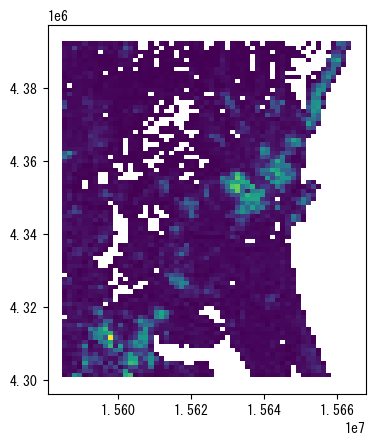

In [31]:
# make a quick plot
ibamesh.plot(column='T001100001_x')

何故かデータのコラムの名前に_xや＿ｙがくっついている
にしても人口が少ない

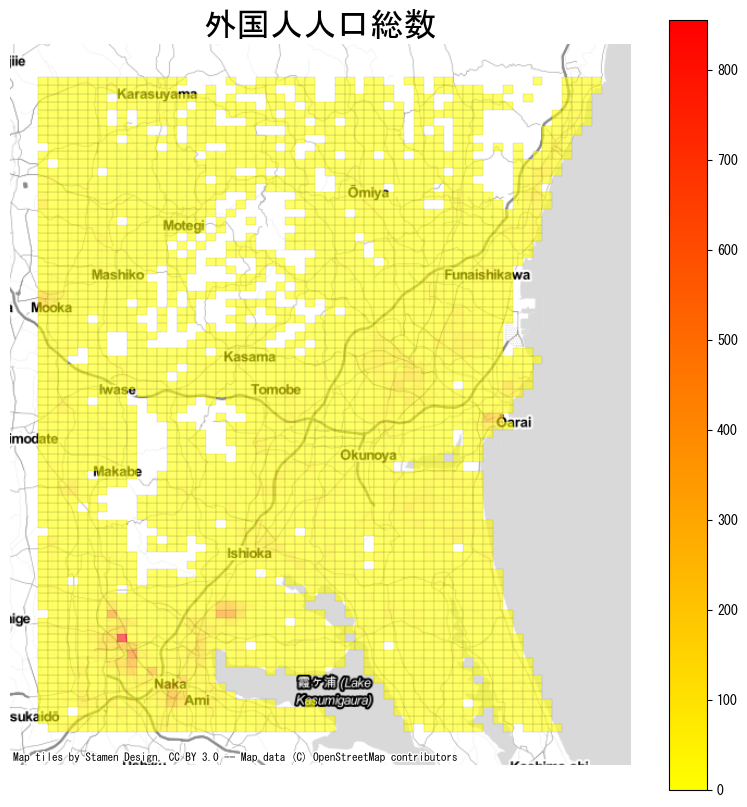

In [33]:
# population map
ax = ibamesh.plot(figsize=(10,10),
         column='T001100031_y',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.6)

# hide axes
ax.axis('off')

# title
ax.set_title('外国人人口総数',fontsize=24);

# add basemap
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)

No.1茨城県　県央の外国人人口の分布
筑波大学や国際的な研究所等があるため筑波に多いのは納得がいく

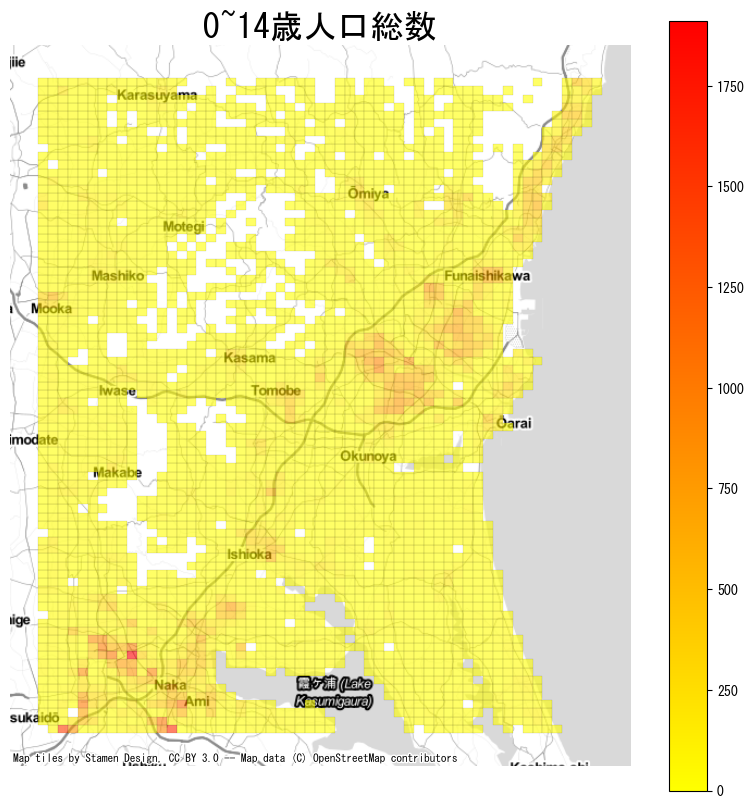

In [32]:
# population map
ax = ibamesh.plot(figsize=(10,10),
         column='T001100004_y',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.6)

# hide axes
ax.axis('off')

# title
ax.set_title('0~14歳人口総数',fontsize=24);

# add basemap
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)

No.2茨城県　県央の0~14歳人口の分布
やはり水戸や筑波、土浦などの栄えている方に集中している

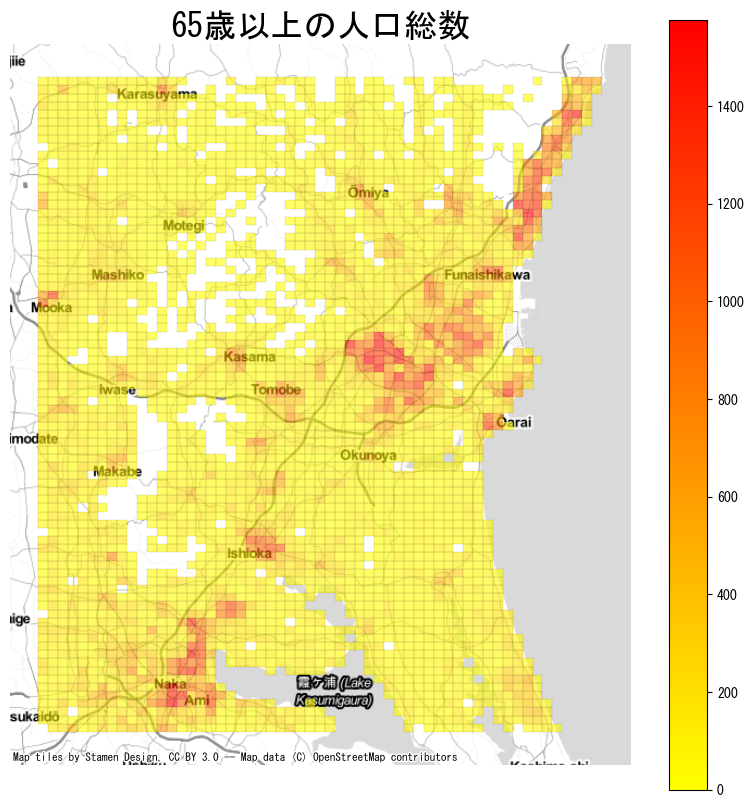

In [34]:
# population map
ax = ibamesh.plot(figsize=(10,10),
         column='T001100019_y',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.6)

# hide axes
ax.axis('off')

# title
ax.set_title('65歳以上の人口総数',fontsize=24);

# add basemap
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)

No.3茨城県　県央の65歳以上の人口の分布
15歳以下の人口分布に比べて範囲も広く数も多い

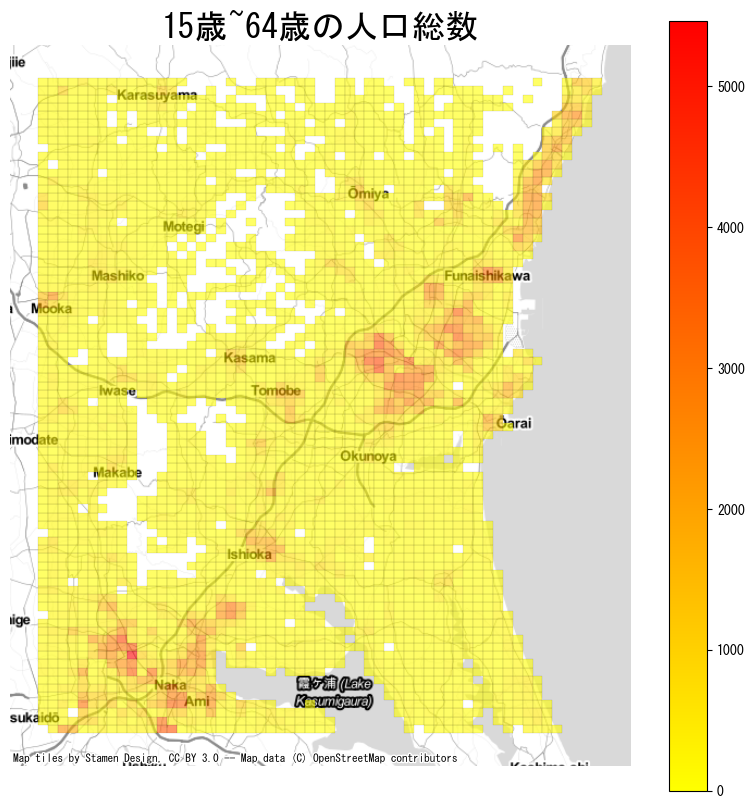

In [35]:
# population map
ax = ibamesh.plot(figsize=(10,10),
         column='T001100010_y',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.6)

# hide axes
ax.axis('off')

# title
ax.set_title('15歳~64歳の人口総数',fontsize=24);

# add basemap
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)

No.4茨城県　県央の15歳~64歳の人口の分布
15歳以上よりは色が濃く、65歳以下よりは色が薄い、ちょうど間くらいの分布になった。

感想
・何故かコラムの名前の後ろに＿ｘや＿ｙがつくようになった。
・数字は変わってなかったため参照は出来た。
・年齢層の分布から見て茨城県はきれいに偏った少子高齢化社会といえる。
・chatgptに答えを聞いてもどこをどう直せばいいかが分からない。